

<img src="https://i.imgflip.com/14vp9i.jpg" width="400" style="float: right; margin: 50px">

# GROUP EDA

Today we will be splitting into 4 groups and presenting our findings the last hour of class.

The goals for todays activity include:

- Defining a problem statement as a group
- Exloring datasets and practicing exploratory analysis 
- Good use of validation
- Communicating results succinctly

You might consider preparing a brief slide deck, but it's not necessary.  We created [these great guidelines](https://github.com/ga-students/DSI-SF-1/wiki/Presentation-Guidelines) to help.

## Deliverables

- 10 Minute presentation, 5 minutes question and answer
- Validation of results

### Optional Feedback

After presentations, please give feedback to each other.

- Peer feedback:  [Use this form](http://goo.gl/forms/ybRIcrwYrVVV4hhR2).  All responses are shared.  Be nice ;)

### Suggestions
- Appoint someone to present / organize
- Look at summary statistics, explore data
- Refine problem statement
- Divide and conquer your workload
- Don't fight - you will be held accountable for presenting _something_.
- You will present


## Group 1:  WOW

<img src="https://snag.gy/tZXe0N.jpg" width="500">


Using [this dataset](https://www.kaggle.com/mylesoneill/warcraft-avatar-history/downloads/warcraft-avatar-history.zip), we would like you to figure out if the following is possible:
 
1. Predict when a user has "churned" or will churn.  We want to know about churn!  What is this about, you will have to research this idea if it is unfamilliar to you.  We want that \$\$\$\$ so help us deal with churn!<br><br>

1. Also, we want to know more about zones and player classes.  We have a hunch something good is happening there.<br><br>

1. Is there anything else we can do to optimize gameplay?<br><br>

1. We're thinking about making yet another expansion.  Are there any themes we might consider based on player behavior *ie: which features are important to consider about current player preferences to ______*?

** Projected Challenges **
- Research
- Problem statement expected to be much more defined
- There are a lot of areas to explore and focus may be difficult without a plan

## Group 2: GOT

<img src="https://snag.gy/8uoD9y.jpg" width="500">

Using [this dataset](./assets/datasets/character-predictions.csv), we would like to know which factors are most important predictors of mortality within our population.  From what we know, this dataset was scraped from [this website](http://awoiaf.westeros.org/index.php/Main_Page) and may provide pointers on the definition of the dataset.

**Projected Challeneges**
- Some munging
- Regression and classification type problems possible
- Data is not as cut and dry as it seems

## Group 3:  Last Words

<img src="https://snag.gy/MElcUY.jpg" width="200">

Using [this dataset](https://docs.google.com/spreadsheet/ccc?key=0ArNsipRBvi69dEUxZHVuRTc4ZlctREdldExsOW5rMUE#gid=0), we would like you to approach this as a study that might inform policy in how law is applied.  The first step in this process, let's assume, is a high level report that illustrates any commonalities and patterns found in this dataset
:

- Common patterns found in last words of inmates
- Commonality of words to other features in dataset
- Of lessor importance, how hard would it be to classify religious inclinations
- Sentiment as a feature or frequency (ie: Check out textblob - pip install textblob)
 - Can this be stratified to other features
 - Which words seem to be common in these cases

** Bonus **
Do any POS patterns look interesting?

**Projected Challenges**
 - Problem statement may be challenging but you will need to come up with one
 - This project is a bit more defined but there are vague problems involved
 - There are a lot of vague asks
 - Heavily NLP based problem

## Group 4: Indeed, you need a job

<img src="https://lh5.googleusercontent.com/CJwGV91wfvsEsDqCBjsg2ahGKAoP2_Wwd3JXXBb8yWPlIT676LlBnsIfG2bFUtOxgLb0ba5WJKfzMiVdT9ncQhSmscdcxPZDnWfV6Qkb0LhR_6Natug72_MsYTLDJS34vg" width="500">

You need a job.  There are lots of jobs with the title "Data Scientist".  There are other jobs as well that have the same skillset.  Recently we [scraped together a dataset](assets/datasets/indeed.csv), that is not super clean but will work.

Which jobs aren't labeled like "data science" jobs, but have a lot of the same features found in "data scientist" jobs?

 - Who is hiring the most? (this may be difficult without updating our scraper and getting more data, but we'll say this is optional)
 - Which skills seem more important to big / medium / small companies or less well known?
 - Which keywords are commmon?
 - Which are rare?

**Projected Challenges**
- Labeled data is based on search terms and results may overlap quite a bit
 - Some cleaning
- Great opportunity to practice NLP
- DO NGRAM ANALYSIS OR ELSE!

PLEASE share your notebooks with the rest of class.  This type of analysis will give you an edge in the job market and lead you to other areas to explore / mine / predict.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import textblob
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns

%matplotlib inline

In [10]:
indeed = pd.read_csv('../Week7/5.2-group_eda/indeed.csv')

In [11]:
indeed.head()

,reviews,search_term,title,location,summary
0,18 reviews,business intelligence,Data Warehouse Development Senior Manager,"Mountain View, CA",Proficiency fostering internal and external bu...
1,"1,486 reviews",business intelligence,"Manager, Healthcare Business Intelligence","San Francisco, CA",Experience working with BI tools such as such ...
2,14 reviews,business intelligence,Business Intelligence Developer,"Mountain View, CA",Work with BI Administrator and Architect to le...
3,90 reviews,business intelligence,Business Intelligence Analyst,NaN,\nOur business is growing and we always lookin...
4,11 reviews,business intelligence,Sr Business Intelligence Analyst,NaN,\nWe have a great opportunity available for a ...


In [12]:
subset = ['search_term', 'summary', 'title']
indeed = indeed[subset]

In [13]:
indeed.search_term.value_counts()

software engineer        1497
analytics                1497
Data Engineer            1494
Data Analyst             1484
Data Scientist           1379
business intelligence    1360
search_term                 5
Name: search_term, dtype: int64

In [14]:
indeed['title'].value_counts()

Data Scientist                                            404
Software Engineer                                         262
Data Engineer                                             157
Entry Level Data and Operations Analyst                   138
Data Analyst                                              125
Segmentation Analyst - Marketing Analytics                111
Senior Business Data Analyst                              107
IT Data and Reporting Analyst                             103
AVP, Sr. Management of Quantitative Analytics             101
Business Analyst                                           89
Senior Data Scientist                                      82
Senior Software Engineer                                   63
Data Warehouse Development Senior Manager                  40
Product Data Analyst                                       36
Full Stack Engineer                                        36
Senior Data Engineer                                       35
Research

In [37]:
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [80]:
indeed_ds = indeed[indeed['title'] == 'Data Scientist']
indeed_not_ds = indeed[indeed['title'] != 'Data Scientist']

In [81]:
tfidf = TfidfVectorizer(ngram_range= (2,4) , stop_words='english')
cvt = CountVectorizer(ngram_range= (2,4) , stop_words='english')

In [82]:
# All of the respective Corpus

summary_indeed = "".join(indeed.summary)
summary_indeed_ds = "".join(indeed_ds.summary)
summary_indeed_n_ds = "".join(indded_not_ds.summary)

In [83]:
tfidf.fit_transform(indeed['summary'])

<8716x164999 sparse matrix of type '<type 'numpy.float64'>'
	with 317914 stored elements in Compressed Sparse Row format>

In [84]:
in_ngrams = tfidf.build_analyzer()(summary_indeed)
in_ = Counter(in_ngrams).most_common(75)

in_ngrams = tfidf.build_analyzer()(summary_indeed_ds)
in_ds = Counter(in_ngrams).most_common(75)

in_ngrams = tfidf.build_analyzer()(summary_indeed_n_ds)
in_n_ds = Counter(in_ngrams).most_common(75)

In [85]:
in_ = pd.DataFrame(in_, columns=['ngram', 'Counts'])
in_ds = pd.DataFrame(in_ds, columns=['ngram', 'DS Counts'])
in_n_ds = pd.DataFrame(in_n_ds, columns=['ngram', 'NDS Counts'])

In [86]:
in_ds.head()

,ngram,DS Counts
0,data scientist,145
1,machine learning,116
2,data mining,73
3,data scientists,55
4,using data,54


In [87]:
in_total = pd.merge(in_, in_ds, how='left', on='ngram')

In [88]:
in_total = pd.merge(in_total, in_n_ds, how='left', on='ngram')

In [89]:
in_total.head()

,ngram,Counts,DS Counts,NDS Counts
0,business intelligence,1074,NaN,1074.0
1,software engineer,676,NaN,676.0
2,big data,476,31.0,447.0
3,machine learning,447,116.0,331.0
4,san francisco,440,NaN,434.0


In [90]:
in_total.fillna(value=0, inplace=True)

In [94]:
in_total.describe()

,Counts,DS Counts,NDS Counts
count,75.000000,75.000000,75.000000
mean,184.133333,7.573333,171.360000
std,148.546410,24.680211,147.748018
min,106.000000,0.000000,0.000000
25%,111.000000,0.000000,111.000000
50%,124.000000,0.000000,119.000000
75%,188.000000,0.000000,186.500000
max,1074.000000,145.000000,1074.000000


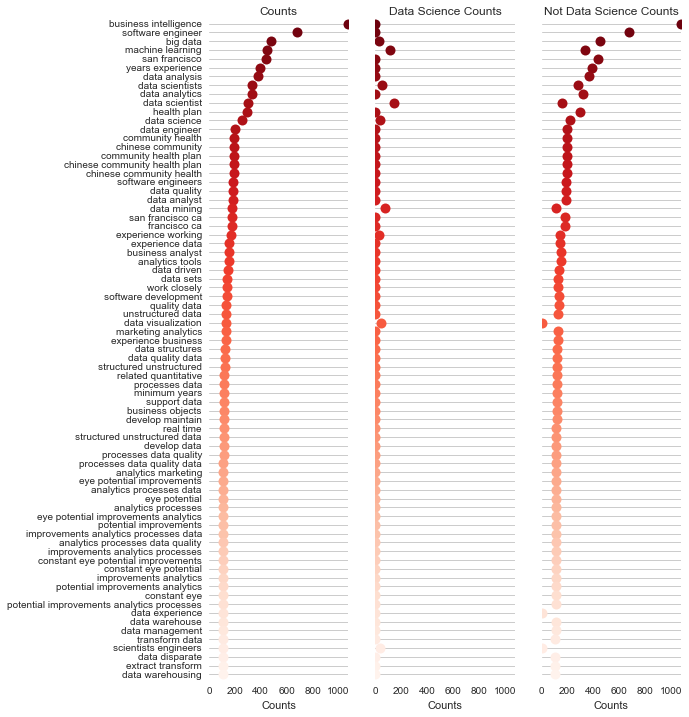

In [108]:
plt.figure(figsize=(10,25))
sns.set(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(in_total, x_vars=["Counts", "DS Counts", "NDS Counts"],
                 y_vars=["ngram"],size=10, aspect=.25)

# Draw DotPlot using stripplot
g.map(sns.stripplot, size = 10, orient = "h", palette="Reds_r", edgecolor="gray")

g.set(xlim=(0, 1075), xlabel="Counts", ylabel="")
titles = ["Counts", "Data Science Counts", "Not Data Science Counts"]

for ax, title in zip(g.axes.flat, titles):
# Set a different title for each axes
    ax.set(title=title)

# Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)